## Polynomial Ridge Lasso and Elasticnet

In [60]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [3]:
data = pd.read_csv(r"C:\Users\mailk\OneDrive\Desktop\AI and ML\Linear Regression\Insurance_Premiums\insurance.csv")

In [4]:
data.head(5)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [6]:
data.shape

(1338, 7)

In [7]:
data['smoker'].replace({'yes': 1, 'no':0}, inplace=True)

In [8]:
data.head(3)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,1,southwest,16884.92
1,18,male,33.8,1,0,southeast,1725.55
2,28,male,33.0,3,0,southeast,4449.46


<AxesSubplot:>

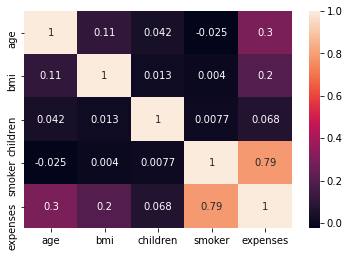

In [9]:
sns.heatmap(data.corr(), annot=True)

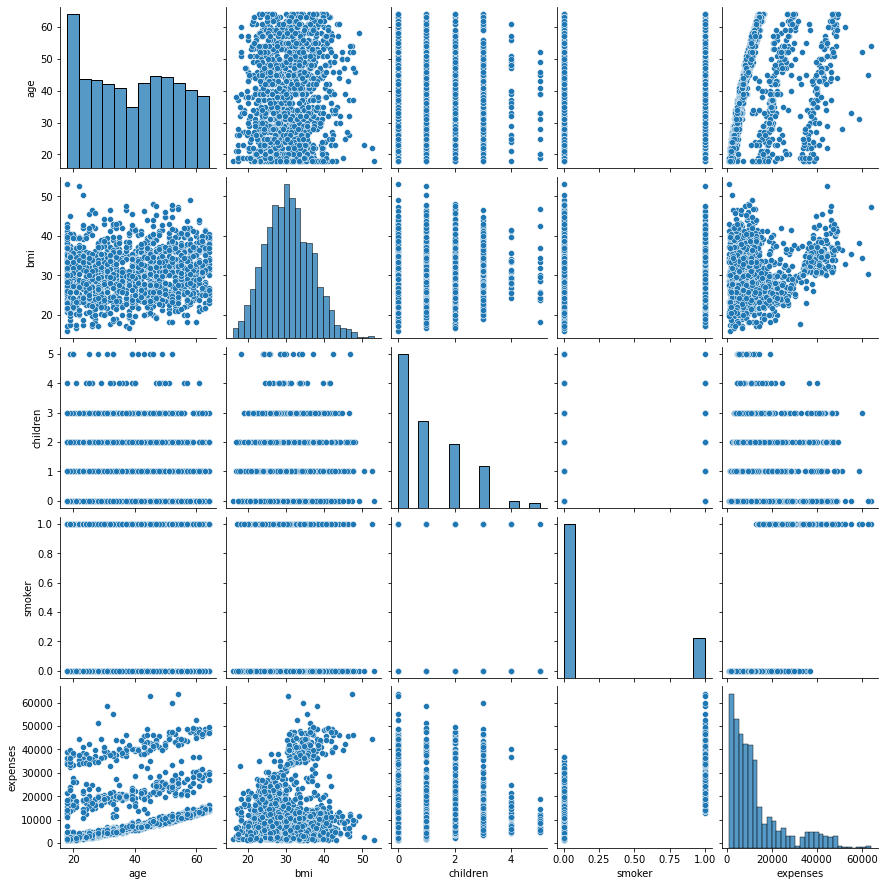

In [10]:
sns.pairplot(data)

In [11]:
X = data.select_dtypes(include=np.number).drop(columns='expenses')

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vd = pd.DataFrame()
vd["feature"] = X.columns

In [13]:
vd["VIF"] = [variance_inflation_factor(X.values,i)
 for i in range(len(X.columns))]

In [14]:
vd

,feature,VIF
0,age,7.538368
1,bmi,8.045396
2,children,1.797415
3,smoker,1.247125


In [15]:
num_col = data.select_dtypes(include=np.number).columns

In [16]:
cat_col = data.select_dtypes(exclude=np.number).columns

In [17]:
cat_data = pd.get_dummies(data[cat_col])

In [18]:
cat_data

,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,1,0,0,1,0
3,0,1,0,1,0,0
4,0,1,0,1,0,0
...,...,...,...,...,...,...
1333,0,1,0,1,0,0
1334,1,0,1,0,0,0
1335,1,0,0,0,1,0
1336,1,0,0,0,0,1


In [19]:
preproc_data = pd.concat([cat_data, data[num_col]], axis='columns')

In [20]:
preproc_data.head(5)

,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children,smoker,expenses
0,1,0,0,0,0,1,19,27.9,0,1,16884.92
1,0,1,0,0,1,0,18,33.8,1,0,1725.55
2,0,1,0,0,1,0,28,33.0,3,0,4449.46
3,0,1,0,1,0,0,33,22.7,0,0,21984.47
4,0,1,0,1,0,0,32,28.9,0,0,3866.86


<AxesSubplot:>

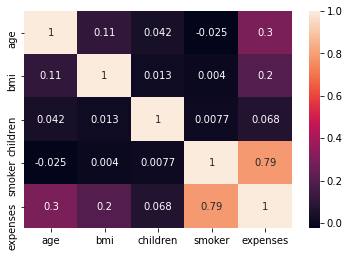

In [21]:
sns.heatmap(preproc_data[num_col].corr(),annot=True)

In [22]:
X = preproc_data[num_col].drop(columns="expenses")

In [23]:
# calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

    feature       VIF
0       age  7.538368
1       bmi  8.045396
2  children  1.797415
3    smoker  1.247125


In [24]:
preproc_data.head(2)

,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children,smoker,expenses
0,1,0,0,0,0,1,19,27.9,0,1,16884.92
1,0,1,0,0,1,0,18,33.8,1,0,1725.55


In [25]:
X = preproc_data.drop(columns='expenses')

In [26]:
y = preproc_data['expenses']

In [27]:
lin1 = LinearRegression()

In [28]:
lin1.fit(X,y)

LinearRegression()

In [29]:
lin1.coef_

array([   65.67600705,   -65.67600705,   586.92290648,   234.13281096,
        -448.67279452,  -372.38292292,   256.83917062,   339.28986331,
         475.68891551, 23847.47669504])

In [30]:
lin1.intercept_

-12594.161374389492

In [31]:
y_pred = lin1.predict(X)

In [32]:
y_pred

array([25292.73983296,  3458.28119063,  6706.61883724, ...,
        4165.74286548,  1246.43276622, 37093.64856899])

In [33]:
mean_squared_error(y, y_pred)

36499631.63514606

In [51]:
r2_score(y, y_pred)

0.7509284662058437

In [34]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=.4, random_state=90)

In [35]:
X_train.head(2)

,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children,smoker
449,0,1,0,0,0,1,35,38.6,1,0
569,0,1,0,1,0,0,48,40.6,2,1


In [36]:
X_test.head(2)

,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children,smoker
1247,0,1,0,0,0,1,33,29.4,4,0
809,0,1,1,0,0,0,25,25.8,1,0


In [37]:
y_train.head(2)

449     4762.33
569    45702.02
Name: expenses, dtype: float64

In [38]:
y_test.head(1)

1247    6059.17
Name: expenses, dtype: float64

In [39]:
lin2 = LinearRegression()

In [40]:
lin2.fit(X_train, y_train)

LinearRegression()

In [41]:
y_train_pred = lin2.predict(X_train)

In [42]:
mean_squared_error(y_train, y_train_pred)

36124629.96103779

In [52]:
r2_score(y_train, y_train_pred)

0.7580006078607036

In [43]:
y_test_pred = lin2.predict(X_test)

In [44]:
mean_squared_error(y_test, y_test_pred)

37569515.556453064

In [53]:
r2_score(y_test, y_test_pred)

0.7357931690487363

In [45]:
kf = KFold(n_splits=10)

In [57]:
i=1
test_result = []
for train_index, test_index in kf.split(X):
    #print('Train Index')
    #print(train_index)
    #print('Test Index')
    #print(test_index)
    train_X = X.iloc[train_index]
    train_y = y.iloc[train_index]
    test_X = X.iloc[test_index]
    test_y = y.iloc[test_index]
        
    model = LinearRegression()
    model.fit(train_X, train_y)

    train_pred = model.predict(train_X)
    test_pred = model.predict(test_X)
    
    train_mape = np.sqrt(mean_squared_error(train_y, train_pred))
    test_mape = np.sqrt(mean_squared_error(test_y, test_pred))
    print("Train MAPE = ",train_mape)
    print("Test MAPE = ",test_mape)
    
    print("Train R2 = ",r2_score(train_y, train_pred))
    print("Test R2 = ",r2_score(test_y, test_pred))
    
    test_result.append(test_mape)

Train MAPE =  6051.130667459046
Test MAPE =  5976.584552877953
Train R2 =  0.746067560296193
Test R2 =  0.7859815711820347
Train MAPE =  6025.380469613099
Test MAPE =  6195.009536232239
Train R2 =  0.7528277701807461
Test R2 =  0.7325203960606488
Train MAPE =  6037.99742200224
Test MAPE =  6087.918797463726
Train R2 =  0.7524235403203211
Test R2 =  0.734875872694446
Train MAPE =  6019.297884446796
Test MAPE =  6271.854330869833
Train R2 =  0.7576615507321114
Test R2 =  0.6688876246684525
Train MAPE =  6026.401010098643
Test MAPE =  6212.734028007826
Train R2 =  0.7478140677492127
Test R2 =  0.7717648435808151
Train MAPE =  6134.337363822612
Test MAPE =  5158.201623867224
Train R2 =  0.7474030147123797
Test R2 =  0.7840092025945997
Train MAPE =  6095.103132915563
Test MAPE =  5545.939161917618
Train R2 =  0.7460267035622159
Test R2 =  0.7931363413003898
Train MAPE =  5932.390576877535
Test MAPE =  6962.770416840529
Train R2 =  0.7597636386289941
Test R2 =  0.6687763561917328
Train MAPE 

In [47]:
model = LinearRegression()

In [56]:
cross_val_score(model, X, y, scoring = 'r2', cv = 10)

array([0.78598157, 0.7325204 , 0.73487587, 0.66888762, 0.77176484,
       0.7840092 , 0.79313634, 0.66877636, 0.74245614, 0.76277403])

In [49]:
X.head(5)

,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children,smoker
0,1,0,0,0,0,1,19,27.9,0,1
1,0,1,0,0,1,0,18,33.8,1,0
2,0,1,0,0,1,0,28,33.0,3,0
3,0,1,0,1,0,0,33,22.7,0,0
4,0,1,0,1,0,0,32,28.9,0,0


In [58]:
y.head(5)

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

## Polynomial

#### fit_transform using polynoial nad use the X is regular model

In [88]:
poly = PolynomialFeatures(degree=6)

In [89]:
X_poly = poly.fit_transform(X)

In [90]:
y.head(4)

0    16884.92
1     1725.55
2     4449.46
3    21984.47
Name: expenses, dtype: float64

In [91]:
lin2 = LinearRegression()

In [92]:
lin2.fit(X_poly, y)

LinearRegression()

In [93]:
y_poly_pred = lin2.predict(X_poly)

In [94]:
r2_score(y, y_poly_pred)

0.9311467875335516

In [95]:
cross_val_score(lin2, X_poly, y, scoring = 'r2', cv = 10)

array([-4.66190798e+03, -2.49151932e+04, -1.96008756e+03, -4.32583760e+04,
       -3.85313859e+05, -5.21649111e+03, -1.59801356e+06, -1.14277619e+05,
       -7.33381631e+06, -4.09241114e+04])

### cross_val_score shows the model is overfitting using poly degrees at 6

## Ridge

In [133]:
rid1 = Ridge(1) ## or rid1 = Ridge(alpha=1)

In [128]:
rid1.fit(X, y)

Ridge(alpha=1)

In [129]:
y_rid1_pred = rid1.predict(X)

In [130]:
mean_squared_error(y, y_rid1_pred)

36501592.73179307

In [131]:
r2_score(y, y_rid1_pred)

0.7509150837872299

In [132]:
cross_val_score(rid1, X, y, scoring = 'r2', cv = 10)

array([0.78580435, 0.73296485, 0.73489872, 0.66954768, 0.77091407,
       0.78390058, 0.79287695, 0.66963951, 0.74214014, 0.7626577 ])

#### Ridge with Poly

In [139]:
poly = PolynomialFeatures(degree=2)

X_poly = poly.fit_transform(X)

In [141]:
rid2 = Ridge(1)

In [143]:
rid2.fit(X_poly, y)

Ridge(alpha=1)

In [145]:
y_poly_pred = rid2.predict(X_poly)

In [146]:
r2_score(y, y_poly_pred)

0.847786704429146

In [147]:
cross_val_score(rid2, X_poly, y, scoring = 'r2', cv = 10)

array([0.85945793, 0.84447916, 0.83032767, 0.75881696, 0.8671199 ,
       0.90055298, 0.85292558, 0.78205755, 0.83872219, 0.82929695])

## Lasso

In [152]:
las1 = Lasso(alpha=3)

In [153]:
las1.fit(X,y)

Lasso(alpha=3)

In [154]:
y_las1_pred = las1.predict(X)

In [155]:
mean_squared_error(y, y_las1_pred)

36499898.71126902

In [156]:
r2_score(y, y_las1_pred)

0.7509266436926674

In [157]:
cross_val_score(las1, X, y, scoring = 'r2', cv = 10)

array([0.7859669 , 0.73261814, 0.73506363, 0.66896334, 0.7715662 ,
       0.78401298, 0.7929674 , 0.66894647, 0.7423906 , 0.76285456])

#### Lasso with Poly

In [183]:
poly3 = PolynomialFeatures(2)

In [184]:
X_poly = poly3.fit_transform(X)

In [193]:
las2 = Lasso(5, max_iter=1000000)

In [194]:
las2.fit(X_poly, y)

Lasso(alpha=5, max_iter=1000000)

In [195]:
y_poly_pred = las2.predict(X_poly)

In [196]:
r2_score(y, y_poly_pred)

0.8476682558487592

In [197]:
cross_val_score(las2, X_poly, y, scoring = 'r2', cv = 10)

array([0.86079022, 0.84464302, 0.83032582, 0.75969266, 0.86838715,
       0.90057575, 0.85395251, 0.78326234, 0.83859548, 0.82949003])

## ElasticNet

In [200]:
elas1 = ElasticNet(alpha=3, l1_ratio=1) ## Testing to see if Lasso is same

In [201]:
elas1.fit(X, y)

ElasticNet(alpha=3, l1_ratio=1)

In [203]:
y_elas1_pred = elas1.predict(X)

In [204]:
mean_squared_error(y, y_elas1_pred)

36499898.71126902

In [205]:
r2_score(y, y_elas1_pred)

0.7509266436926674

In [206]:
cross_val_score(elas1, X, y, scoring = 'r2', cv = 10)

array([0.7859669 , 0.73261814, 0.73506363, 0.66896334, 0.7715662 ,
       0.78401298, 0.7929674 , 0.66894647, 0.7423906 , 0.76285456])

### using 50% Ridge and Lasso

In [247]:
elas2 = ElasticNet(alpha=1, l1_ratio=0.5)

In [248]:
elas2.fit(X, y)

ElasticNet(alpha=1)

In [249]:
y_elas2_pred = elas2.predict(X)

In [250]:
mean_squared_error(y, y_elas2_pred)

88967989.01228802

In [251]:
r2_score(y, y_elas2_pred)

0.3928872021674158

In [252]:
cross_val_score(elas2, X, y, scoring='r2', cv=10)

array([0.39764164, 0.40426368, 0.39133215, 0.38557462, 0.37239858,
       0.38459544, 0.41987601, 0.37996748, 0.31053361, 0.40481026])

#### Elasticnet with Poly

In [255]:
poly4 = PolynomialFeatures(2)

In [256]:
X_poly = poly4.fit_transform(X)

In [283]:
elas3 = ElasticNet(alpha=1, l1_ratio=.9, max_iter=100000)

In [284]:
elas3.fit(X_poly, y)

ElasticNet(alpha=1, l1_ratio=0.9, max_iter=100000)

In [285]:
y_elas3_pred = elas3.predict(X_poly)

In [286]:
r2_score(y, y_elas3_pred)

0.8364138865090214

In [289]:
cross_val_score(elas3, X_poly, y, scoring = 'r2', cv = 10)

array([0.855077  , 0.82731174, 0.81370553, 0.75366148, 0.85780467,
       0.88389916, 0.85558728, 0.77254326, 0.82682281, 0.82668022])